In [38]:
import pandas as pd

In [67]:
ftse_df = pd.read_csv('files/0-Base_Indexes_Composition - FTSE-Comp.csv')
snp500_df = pd.read_csv('files/0-Base_Indexes_Composition - SP500.csv')

In [68]:
def preprocess_dataframe(df):
    
    df.OrgPermID = df.OrgPermID.astype(str)
    df['Index Date'] = pd.to_datetime(df['Index Date'])
    df['Month'] = df.loc[:, 'Index Date'].astype(str).apply(lambda x: x[:8] + '01')
    df = df[df['Index Date'] >= '2006-01-01'].reset_index(drop=True)

    return df

ftse_df = preprocess_dataframe(ftse_df)
snp500_df = preprocess_dataframe(snp500_df)

/tmp/ipykernel_1244295/1069341742.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Index Date'] = pd.to_datetime(df['Index Date'])


---

# Data Check

In [161]:
aggregate_ftse_prices_data

,Company Name
Month,
2006-01-01,100
2006-02-01,100
2006-03-01,100
2006-04-01,100
2006-05-01,100
...,...
2022-12-01,100
2023-01-01,100
2023-02-01,100


<Axes: title={'center': 'FTSE CONSTITUENTS ORI-DATA'}, xlabel='Month'>

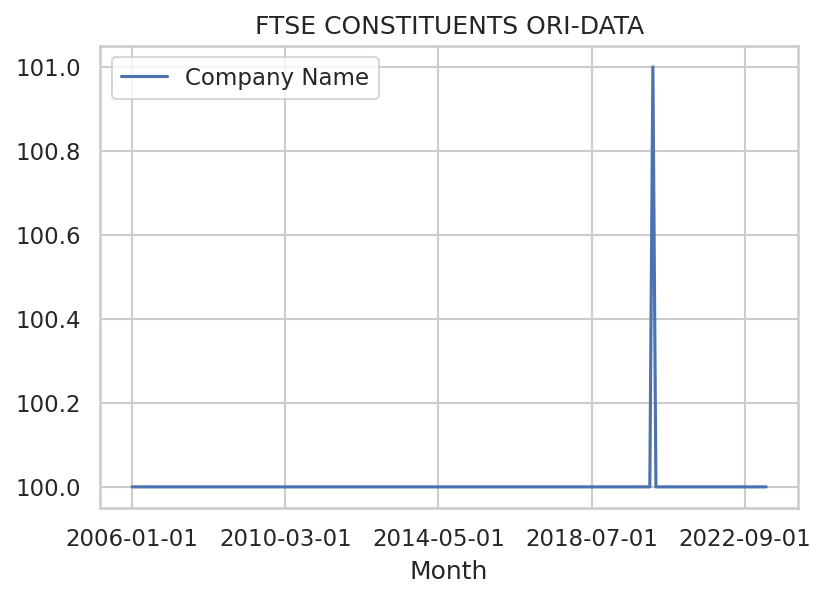

In [85]:
aggregate_ftse_prices_data = ftse_df[['Month','Company Name']].groupby('Month').nunique()
aggregate_ftse_prices_data.plot(title= 'FTSE CONSTITUENTS ORI-DATA')

<Axes: title={'center': 'SP500 CONSTITUENTS ORI-DATA'}, xlabel='Month'>

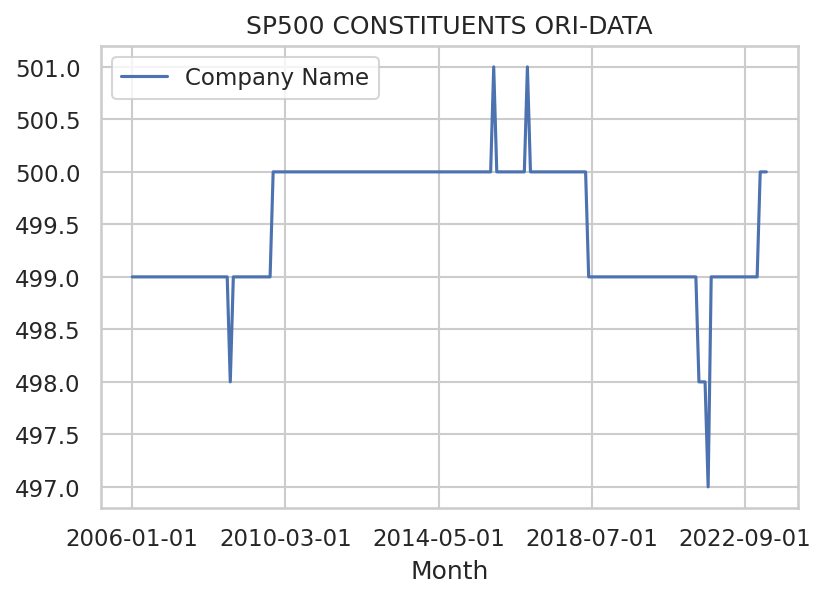

In [87]:
aggregate_snp_prices_data = snp500_df[['Month','Company Name']].groupby('Month').nunique()
aggregate_snp_prices_data.plot(title= 'SP500 CONSTITUENTS ORI-DATA')

# FTSE

In [73]:
def collect_prices(df):

    unique_month_years = df[['Month']].drop_duplicates()
    price_master_df = pd.DataFrame()

    for _, row in unique_month_years.iterrows():
        month = row['Month']
        
        subset_df = df[(df['Month'] == month)].copy()
        
        assets = subset_df.loc[:, 'OrgPermID'].values
        min_date = str(subset_df.iloc[0, 2])
        min_date = min_date[:8] + '01'
        max_date = str(subset_df.iloc[0, 2])[:10]
        
        prices_df = trmiv4.prices_dai(assets=assets, group = 'equ', start = min_date, end=max_date)
        price_master_df = pd.concat([price_master_df, prices_df])
        print(min_date, max_date, '| Total Assets: ', len(prices_df.Asset.unique()))

    return price_master_df

In [11]:
ftse_price_df = collect_prices(ftse_df)

2006-01-01 2006-01-31 | Total Assets:  94
2006-02-01 2006-02-28 | Total Assets:  94
2006-03-01 2006-03-31 | Total Assets:  94
2006-04-01 2006-04-30 | Total Assets:  94
2006-05-01 2006-05-31 | Total Assets:  94
2006-06-01 2006-06-30 | Total Assets:  94
2006-07-01 2006-07-31 | Total Assets:  94
2006-08-01 2006-08-31 | Total Assets:  94
2006-09-01 2006-09-30 | Total Assets:  94
2006-10-01 2006-10-31 | Total Assets:  94
2006-11-01 2006-11-30 | Total Assets:  94
2006-12-01 2006-12-31 | Total Assets:  94
2007-01-01 2007-01-31 | Total Assets:  94
2007-02-01 2007-02-28 | Total Assets:  94
2007-03-01 2007-03-31 | Total Assets:  93
2007-04-01 2007-04-30 | Total Assets:  93
2007-05-01 2007-05-31 | Total Assets:  93
2007-06-01 2007-06-30 | Total Assets:  93
2007-07-01 2007-07-31 | Total Assets:  93
2007-08-01 2007-08-31 | Total Assets:  93
2007-09-01 2007-09-30 | Total Assets:  93
2007-10-01 2007-10-31 | Total Assets:  93
2007-11-01 2007-11-30 | Total Assets:  93
2007-12-01 2007-12-31 | Total Asse

In [12]:
snp500_price_df = collect_prices(snp500_df)

2006-01-01 2006-01-31 | Total Assets:  446
2006-02-01 2006-02-28 | Total Assets:  448
2006-03-01 2006-03-31 | Total Assets:  446
2006-04-01 2006-04-30 | Total Assets:  446
2006-05-01 2006-05-31 | Total Assets:  448
2006-06-01 2006-06-30 | Total Assets:  449
2006-07-01 2006-07-31 | Total Assets:  449
2006-08-01 2006-08-31 | Total Assets:  448
2006-09-01 2006-09-30 | Total Assets:  448
2006-10-01 2006-10-31 | Total Assets:  449
2006-11-01 2006-11-30 | Total Assets:  449
2006-12-01 2006-12-31 | Total Assets:  448
2007-01-01 2007-01-31 | Total Assets:  449
2007-02-01 2007-02-28 | Total Assets:  449
2007-03-01 2007-03-31 | Total Assets:  449
2007-04-01 2007-04-30 | Total Assets:  450
2007-05-01 2007-05-31 | Total Assets:  453
2007-06-01 2007-06-30 | Total Assets:  451
2007-07-01 2007-07-31 | Total Assets:  451
2007-08-01 2007-08-31 | Total Assets:  452
2007-09-01 2007-09-30 | Total Assets:  452
2007-10-01 2007-10-31 | Total Assets:  454
2007-11-01 2007-11-30 | Total Assets:  455
2007-12-01 

In [13]:
ftse_price_df.to_csv('files/1-FTSE_PRICES_2006-2023.csv')

In [14]:
snp500_price_df.to_csv('files/1-SNP_PRICES_2006-2023.csv')

In [79]:
ftse_price_df['Month'] = ftse_price_df['Date'].astype(str).apply(lambda x: x[:8] + '01')
snp500_price_df['Month'] = snp500_price_df['Date'].astype(str).apply(lambda x: x[:8] + '01')

In [80]:
agg_price_ftse_df = ftse_price_df[['Month','Asset']].groupby('Month').nunique()
agg_price_sp_df = snp500_price_df[['Month','Asset']].groupby('Month').nunique()

In [94]:
agg_price_ftse_df = pd.merge(aggregate_ftse_prices_data, agg_price_ftse_df, left_index=True, right_index=True, how = 'inner')
agg_price_ftse_df = agg_price_ftse_df.rename(columns={'Company Name':'Original-Cons', 'Asset': 'Price-Data'})

In [103]:
agg_price_sp_df = pd.merge(aggregate_snp_prices_data, agg_price_sp_df, left_index=True, right_index=True, how = 'inner')
agg_price_sp_df = agg_price_sp_df.rename(columns={'Company Name':'Original-Cons', 'Asset': 'Price-Data'})

In [110]:
agg_price_ftse_df.index = pd.to_datetime(agg_price_ftse_df.index)

In [117]:
def dual_axis_plot(df, column1 = 'column1' , column2 = 'column2'):

    # assuming df is your DataFrame and 'column1' and 'column2' are the columns you want to plot
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    # we already handled the x-label with ax1
    ax1.set_ylabel(column1, color=color)
    ax1.plot(df[column1], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx()  

    color = 'tab:blue'
    # we already handled the x-label with ax1
    ax2.set_ylabel(column2, color=color)  
    ax2.plot(df[column2], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    ax2.set_ylim(92, 105)
    
    # Synchronize y-axis
    ax1.set_ylim(ax2.get_ylim())

    # otherwise the right y-label is slightly clipped
    fig.tight_layout()  
    plt.show()

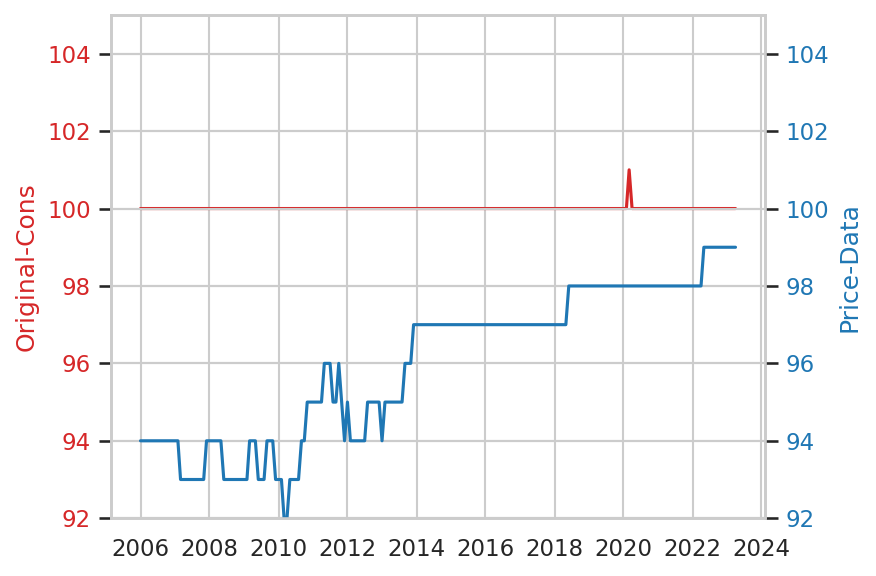

In [118]:
dual_axis_plot(agg_price_ftse_df, 'Original-Cons', 'Price-Data')

<Axes: title={'center': 'Price Data FTSE100 (prices_dai)'}, xlabel='Month'>

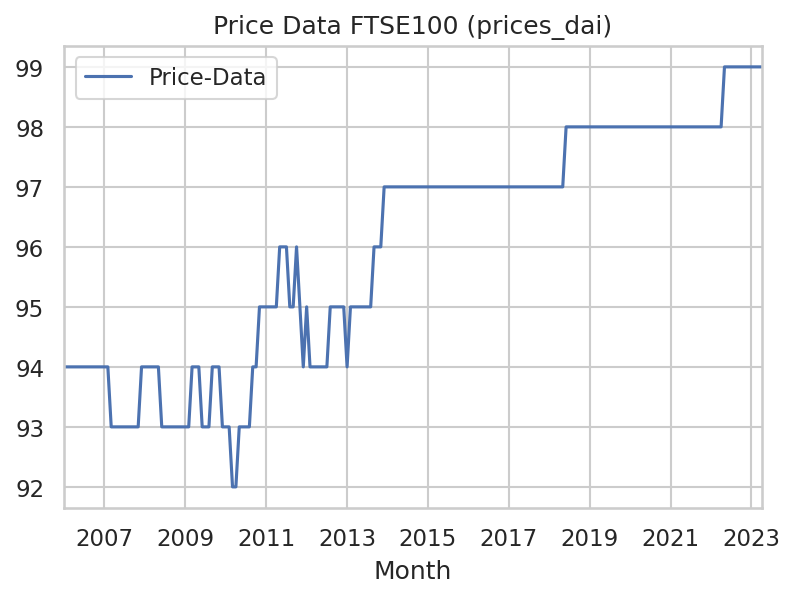

In [131]:
agg_price_ftse_df[['Price-Data']].plot(title='Price Data FTSE100 (prices_dai)')

<Axes: title={'center': 'Price Data SP500 (prices_dai)'}, xlabel='Month'>

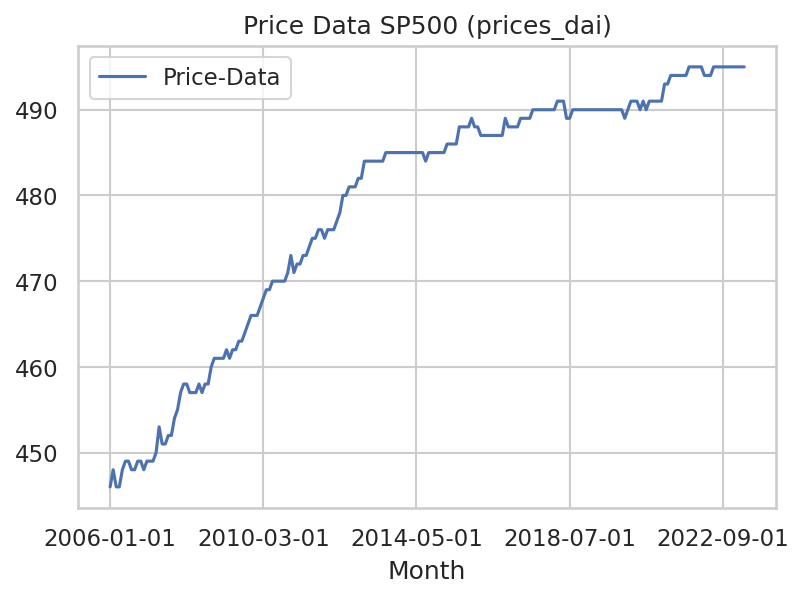

In [130]:
agg_price_sp_df[['Price-Data']].plot(title='Price Data SP500 (prices_dai)')

<Axes: title={'center': 'Diff Original Constituents to Price Data'}, xlabel='Month'>

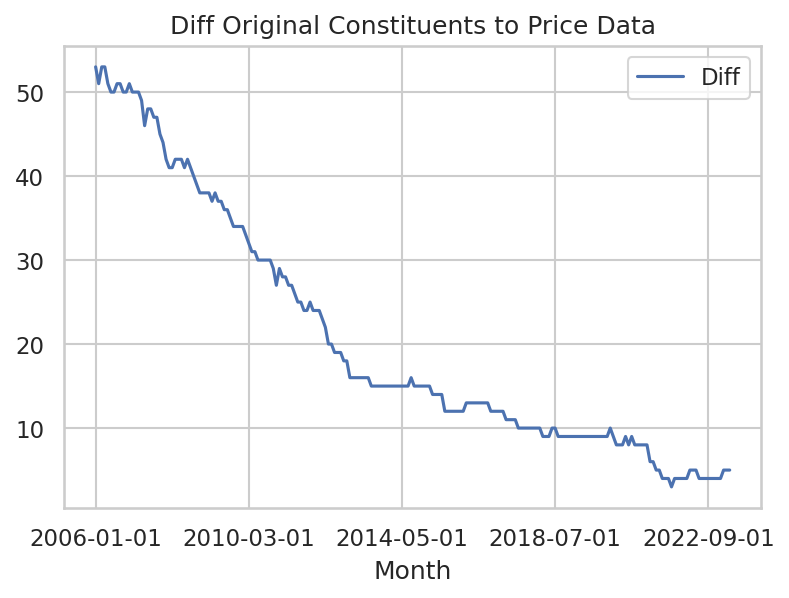

In [128]:
agg_price_sp_df['Diff'] = agg_price_sp_df['Original-Cons'] - agg_price_sp_df['Price-Data']
agg_price_sp_df[['Diff']].plot(title='Diff Original Constituents to Price Data')

<Axes: title={'center': 'Diff Original Constituents to Price Data'}, xlabel='Month'>

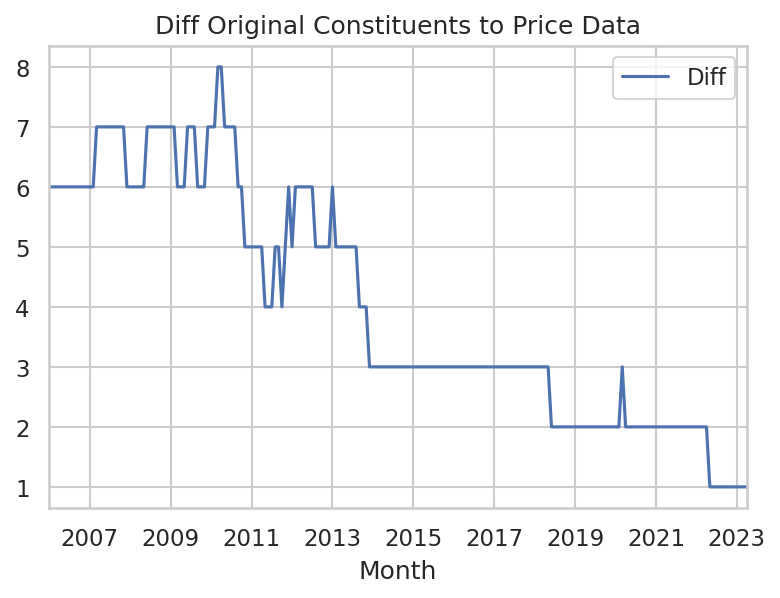

In [126]:
agg_price_ftse_df['Diff'] = agg_price_ftse_df['Original-Cons'] - agg_price_ftse_df['Price-Data']
agg_price_ftse_df[['Diff']].plot(title='Diff Original Constituents to Price Data')

# Robustness Check

In [160]:
assets_lists_df = v4.coverage_equ([-1])

In [139]:
# average of close price for every assets every month...
cols = ['Asset', 'Close', 'Month']

ftse_price_df[cols].groupby(['Asset', 'Month'], as_index=False).mean()

,Asset,Month,Close
0,4295856631,2006-01-01,9.510671
1,4295856631,2006-02-01,9.222821
2,4295856631,2006-03-01,9.644598
3,4295856631,2006-04-01,10.118376
4,4295856631,2006-05-01,10.209097
...,...,...,...
19961,8589934340,2022-12-01,4.442249
19962,8589934340,2023-01-01,4.491666
19963,8589934340,2023-02-01,4.446399
19964,8589934340,2023-03-01,4.266781


In [143]:
# average of close price for every assets every month...
cols = ['Asset', 'Close', 'Month', 'Currency']

agg_assets_prices = ftse_price_df[cols].groupby(['Asset', 'Month', 'Currency'], as_index=False).mean()
agg_assets_prices.index = agg_assets_prices.Month

In [140]:
unique_assets = ftse_price_df['Asset'].unique()

In [148]:
agg_assets_prices

,Asset,Month,Currency,Close
Month,,,,
2006-01-01,4295856631,2006-01-01,AUD,9.510671
2006-02-01,4295856631,2006-02-01,AUD,9.222821
2006-03-01,4295856631,2006-03-01,AUD,9.644598
2006-04-01,4295856631,2006-04-01,AUD,10.118376
2006-05-01,4295856631,2006-05-01,AUD,10.209097
...,...,...,...,...
2022-12-01,8589934340,2022-12-01,GBP,4.442249
2023-01-01,8589934340,2023-01-01,GBP,4.491666
2023-02-01,8589934340,2023-02-01,GBP,4.446399


In [152]:
len(unique_assets)

210

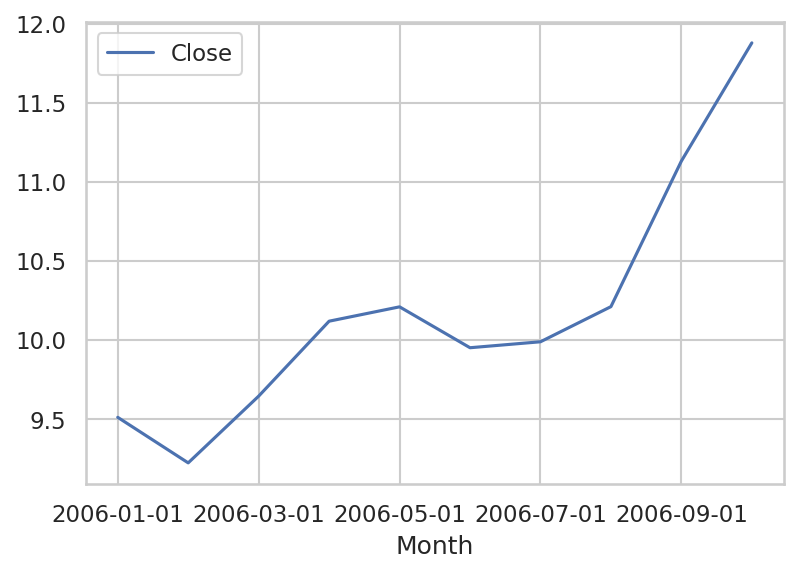

In [151]:
for asset in unique_assets:
    
    temp_df = agg_assets_prices[agg_assets_prices['Asset'] == asset].copy()
    temp_df[['Close']].plot()
    
    agg_assets_prices[agg_assets_prices['Asset'] == '4295856631'][['Close']].plot()
    
    break